## Sentiment Analysis on Movie review dataset

In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# set width of the columns as 800 charactors
pd.set_option('max_colwidth', 800)

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Juhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv(r"C:\Users\Juhi\PycharmProjects\Sentiment_Analysis\IMDB Dataset.csv")

## Performing EDA

In [5]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangst...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on ou...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of h...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing on

In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.describe(include="all")

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [9]:
#First 10 positive sentiments
df[df["sentiment"]=="positive"][:10]

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangst...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on ou...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of h...",positive
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these ...",positive
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like ""dressed-up midgets"" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be ""up"" for this movie.",positive
6,"I sure would like to see a resurrection of a up

In [10]:
#First 10 negative sentiments
df[df["sentiment"]=="negative"][:10]

,review,sentiment
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect f...",negative
8,"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.",negative
10,"Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try ""Brother from another planet""",negative
11,"I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that po...",negative
12,"So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret res

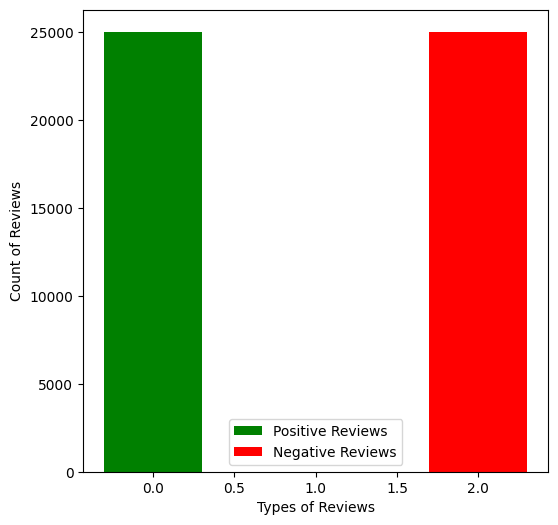

In [11]:
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()

plot_counts(len(df[df['sentiment']=="positive"]),len(df[df['sentiment']=="negative"]))

In [12]:
#the count of positive and negative sentiments is equal
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [13]:
#finding total number of duplicates
df.duplicated().sum()

418

In [14]:
#dropping duplicate entries
df.drop_duplicates(inplace=True)

In [15]:
# remove own index with default index
df.reset_index(inplace = True, drop = True)

In [16]:
df.shape

(49582, 2)

In [17]:
#percentage distribution of negative and positive sentiments
df.sentiment.value_counts()*100/len(df)

positive    50.187568
negative    49.812432
Name: sentiment, dtype: float64

In [18]:
#checking for null values
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Analyzing the number of words in reviews

In [19]:
def cal_len(content):
    splitted_content = content.split()
    return len(splitted_content)

In [20]:
df['length'] = df['review'].apply(cal_len)

In [21]:
## Calculating avg length of positive and negative review
pos_review_length = np.mean(df.length[df['sentiment']=="positive"])
neg_review_length = np.mean(df.length[df['sentiment']=="negative"])

In [22]:
print("Positive Review:",pos_review_length,"Negative Review:",neg_review_length)

Positive Review: 233.09062047902268 Negative Review: 229.59660701271358


## Data Cleaning

In [23]:
## Defining function to decode HTML-encoded characters
def decode_html(text):
    decoded_text = BeautifulSoup(text, "html.parser").get_text()
    return decoded_text

In [24]:
df['review'] = df['review'].apply(decode_html)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_18336\338121850.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  decoded_text = BeautifulSoup(text, "html.parser").get_text()


In [25]:
df.head()

,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians,...",positive,307
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particul...",positive,162
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wi...",positive,166
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the 

In [26]:
#removing the br tages from text
def remove_tags(text):
    text = re.sub("\<br \/\>", "", text)
    return text

In [27]:
df['review'] = df['review'].apply(remove_tags)

In [28]:
df.head()

,review,sentiment,length
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians,...",positive,307
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particul...",positive,162
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wi...",positive,166
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the 

In [29]:
# stop is a set of all english stopwords as well as punctuation
stop = set(stopwords.words('english')) 
punctuation = list(punctuation)
stop.update(punctuation) 

In [30]:
stop.add(",")
stop.add(".")

In [31]:
negative_words = set(["aren'","aren't","couldn","couldn't",'didn', "didn't",'doesn',
 "doesn't",'don',"don't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't", 'isn', "isn't",'mightn',
 "mightn't",'mustn',"mustn't",'needn',"needn't",'no','nor','not','shan',"shan't",'shouldn',
 "shouldn't",'wasn',"wasn't",'weren', "weren't","won't",'wouldn',"wouldn't"])

In [32]:
#remvoing all negative words from stopwords
stop = stop - negative_words

In [33]:
def lower_text(content):
    return content.lower()
    
df['review'] = df['review'].apply(lower_text)

In [34]:
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [35]:
#Apply function on review column
df['review']=df['review'].apply(remove_stopwords)

In [36]:
df.head()

,review,sentiment,length
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, not show faint hearted timid. show pulls no punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy not high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows wouldn't dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz doesn't mes...",positive,307
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen not ""has got polari"" voices pat too! truly see seamless editing guided references williams' diary entries, not well worth watching terrificly written performed piece. masterful production one great master's comedy life. realism really comes home little things: fantasy guard which, rather use traditional 'dream' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell's murals decorating every surface) terribly well done.",positive,162
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize not match point 2: risk addiction, thought proof woody allen still fully control style many us grown love.this i'd laughed one woody's comedies years (dare say decade?). i've never impressed scarlet johanson, managed tone ""sexy"" image jumped right average, spirited young woman.this may not crown jewel career, wittier ""devil wears prada"" interesting ""superman"" great comedy go see friends.",positive,166
3,"basically there's family little boy (jake) thinks there's zombie closet parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable. parents divorcing arguing like real life. jake closet totally ruins film! expected see boogeyman similar movie, instead watched drama meaningless thriller spots.3 10 well playing parents descent dialogs. shots jake: ignore them.",negative,138
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director transfers action present time new york different characters meet connect. one connected one way, another next person, no one seems know previous point contact. stylishly, film sophisticated luxurious look. taken see people live world live habitat.the thing one gets souls picture different stages loneliness one inhabits. big city not exactly best place human relations find sincere fulfillment, one discerns case people encounter.the acting good mr. mattei's direction. steve buscemi, rosario dawson, carol kane, michael imperioli, adrian greni...",positive,230


In [37]:
#Removes URL data
def remove_url(text):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    return text

In [38]:
df['review'] = df['review'].apply(remove_url)

In [39]:
df.head()

,review,sentiment,length
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, not show faint hearted timid. show pulls no punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy not high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows wouldn't dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz doesn't mes...",positive,307
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen not ""has got polari"" voices pat too! truly see seamless editing guided references williams' diary entries, not well worth watching terrificly written performed piece. masterful production one great master's comedy life. realism really comes home little things: fantasy guard which, rather use traditional 'dream' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell's murals decorating every surface) terribly well done.",positive,162
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize not match point 2: risk addiction, thought proof woody allen still fully control style many us grown love.this i'd laughed one woody's comedies years (dare say decade?). i've never impressed scarlet johanson, managed tone ""sexy"" image jumped right average, spirited young woman.this may not crown jewel career, wittier ""devil wears prada"" interesting ""superman"" great comedy go see friends.",positive,166
3,"basically there's family little boy (jake) thinks there's zombie closet parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable. parents divorcing arguing like real life. jake closet totally ruins film! expected see boogeyman similar movie, instead watched drama meaningless thriller spots.3 10 well playing parents descent dialogs. shots jake: ignore them.",negative,138
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director transfers action present time new york different characters meet connect. one connected one way, another next person, no one seems know previous point contact. stylishly, film sophisticated luxurious look. taken see people live world live habitat.the thing one gets souls picture different stages loneliness one inhabits. big city not exactly best place human relations find sincere fulfillment, one discerns case people encounter.the acting good mr. mattei's direction. steve buscemi, rosario dawson, carol kane, michael imperioli, adrian greni...",positive,230


## Tokenization

In [40]:
# using gensim library to tokenzie reviews
df["tokenized_text"] = [gensim.utils.simple_preprocess(line, deacc=True) for line in df["review"]]

In [41]:
df.head()

,review,sentiment,length,tokenized_text
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, not show faint hearted timid. show pulls no punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy not high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows wouldn't dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz doesn't mes...",positive,307,"[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, me, the, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, me, not, show, faint, hearted, timid, show, pulls, no, punches, regards, drugs, sex, violence, hardcore, classic, use, word, it, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, not, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, more, so, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, goes, ...]"
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen not ""has got polari"" voices pat too! truly see seamless editing guided references williams' diary entries, not well worth watching terrificly written performed piece. masterful production one great master's comedy life. realism really comes home little things: fantasy guard which, rather use traditional 'dream' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell's murals decorating every surface) terribly well done.",positive,162,"[wonderful, little, production, filming, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, not, has, got, polari, voices, pat, too, truly, see, seamless, editing, guided, references, williams, diary, entries, not, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, master, comedy, life, realism, really, comes, home, little, things, fantasy, guard, which, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, concerning, orton, halliwell, sets, particularly, flat, halliwell, murals, decorating, every, surface, terribly, well, done]"
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize not match point 2: risk addiction, thought proof woody allen still fully control style many us grown love.this i'd laughed one woody's comedies years (dare say decade?). i've never impressed scarlet johanson, managed tone ""sexy"" image jumped right average, spirited young woman.this may not crown jewel career, wittier ""devil wears prada"" interesting ""superman"" great comedy go see friends.",positive,166,"[thought, wonderful, way, spend, time, hot, summer, weekend, sitting, air, conditioned, theater, watching, light, hearted, comedy, plot, simplistic, dialogue, witty, characters, likable, even, well, bread, suspected, serial, killer, may, di

## Applying both stemming and lemming and observing the difference

### Stemming
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word,

In [42]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = [port_stem.stem(word) for word in content]
    return stemmed_content

In [43]:
df['stemmed_review'] = df['tokenized_text'].apply(stemming)

In [44]:
df.head()

,review,sentiment,length,tokenized_text,stemmed_review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, not show faint hearted timid. show pulls no punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy not high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows wouldn't dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz doesn't mes...",positive,307,"[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, me, the, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, me, not, show, faint, hearted, timid, show, pulls, no, punches, regards, drugs, sex, violence, hardcore, classic, use, word, it, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, not, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, more, so, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, goes, ...]","[one, review, mention, watch, oz, episod, hook, right, exactli, happen, me, the, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, me, not, show, faint, heart, timid, show, pull, no, punch, regard, drug, sex, violenc, hardcor, classic, use, word, it, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cell, glass, front, face, inward, privaci, not, high, agenda, em, citi, home, mani, aryan, muslim, gangsta, latino, christian, italian, irish, more, so, scuffl, death, stare, dodgi, deal, shadi, agreement, never, far, away, would, say, main, appeal, show, due, fact, goe, ...]"
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen not ""has got polari"" voices pat too! truly see seamless editing guided references williams' diary entries, not well worth watching terrificly written performed piece. masterful production one great master's comedy life. realism really comes home little things: fantasy guard which, rather use traditional 'dream' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell's murals decorating every surface) terribly well done.",positive,162,"[wonderful, little, production, filming, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, michael, sheen, not, has, got, polari, voices, pat, too, truly, see, seamless, editing, guided, references, williams, diary, entries, not, well, worth, watching, terrificly, written, performed, piece, masterful, production, one, great, master, comedy, life, realism, really, comes, home, little, things, fantasy, guard, which, rather, use, traditional, dream, techniques, remains, solid, disappears, plays, knowledge, senses, particularly, scenes, concerning, orton, halliwell, sets, particularly, flat, halliwell, murals, decorating, every, surface, terribly, well, done]","[wonder, littl, product, film, techniqu, unassum, old, time, bbc, fashion, give, comfort, sometim, discomfort, sens, realism, entir, piec, actor, extrem, well, chosen, michael,

### Lemming
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

In [45]:
lemmatizer = WordNetLemmatizer()

In [46]:
def lemming(content):
    lemmed_content = [lemmatizer.lemmatize(word) for word in content]
    return lemmed_content

In [47]:
df['lemmetized_review'] = df['tokenized_text'].apply(lemming)

In [48]:
df.head()

,review,sentiment,length,tokenized_text,stemmed_review,lemmetized_review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, not show faint hearted timid. show pulls no punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy not high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows wouldn't dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz doesn't mes...",positive,307,"[one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, me, the, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, me, not, show, faint, hearted, timid, show, pulls, no, punches, regards, drugs, sex, violence, hardcore, classic, use, word, it, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, not, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, more, so, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, would, say, main, appeal, show, due, fact, goes, ...]","[one, review, mention, watch, oz, episod, hook, right, exactli, happen, me, the, first, thing, struck, oz, brutal, unflinch, scene, violenc, set, right, word, go, trust, me, not, show, faint, heart, timid, show, pull, no, punch, regard, drug, sex, violenc, hardcor, classic, use, word, it, call, oz, nicknam, given, oswald, maximum, secur, state, penitentari, focus, mainli, emerald, citi, experiment, section, prison, cell, glass, front, face, inward, privaci, not, high, agenda, em, citi, home, mani, aryan, muslim, gangsta, latino, christian, italian, irish, more, so, scuffl, death, stare, dodgi, deal, shadi, agreement, never, far, away, would, say, main, appeal, show, due, fact, goe, ...]","[one, reviewer, mentioned, watching, oz, episode, hooked, right, exactly, happened, me, the, first, thing, struck, oz, brutality, unflinching, scene, violence, set, right, word, go, trust, me, not, show, faint, hearted, timid, show, pull, no, punch, regard, drug, sex, violence, hardcore, classic, use, word, it, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focus, mainly, emerald, city, experimental, section, prison, cell, glass, front, face, inwards, privacy, not, high, agenda, em, city, home, many, aryan, muslim, gangsta, latino, christian, italian, irish, more, so, scuffle, death, stare, dodgy, dealing, shady, agreement, never, far, away, would, say, main, appeal, show, due, fact, go, ...]"
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen not ""has got polari"" voices pat too! truly see seamless editing guided references williams' diary entries, not well worth watching terrificly written performed piece. masterful production one great master's comedy life. realism really comes home little things: fantasy guard which, rather use traditional 'dream' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell's murals decorating every surface) terribly well done.",positive,162,"[wonderful, little, production, filming, technique, unassuming, old, time, bbc, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, actors, extremely, well, chosen, 

In [49]:
df["stemmed_review"].tail(1)

49581    [no, one, expect, star, trek, movi, high, art, fan, expect, movi, good, best, episod, unfortun, movi, muddl, implaus, plot, left, cring, far, worst, nine, so, far, movi, even, chanc, watch, well, known, charact, interact, anoth, movi, can, save, movi, includ, goofi, scene, kirk, spock, mccoy, yosemit, would, say, movi, not, worth, rental, hardli, worth, watch, howev, true, fan, need, see, movi, rent, movi, way, see, even, cabl, channel, avoid, movi]
Name: stemmed_review, dtype: object

In [50]:
df["lemmetized_review"].tail(1)

49581    [no, one, expects, star, trek, movie, high, art, fan, expect, movie, good, best, episode, unfortunately, movie, muddled, implausible, plot, left, cringing, far, worst, nine, so, far, movie, even, chance, watch, well, known, character, interact, another, movie, can, save, movie, including, goofy, scene, kirk, spock, mccoy, yosemite, would, say, movie, not, worth, rental, hardly, worth, watching, however, true, fan, need, see, movie, renting, movie, way, see, even, cable, channel, avoid, movie]
Name: lemmetized_review, dtype: object

## Displaying word cloud

(-0.5, 1599.5, 599.5, -0.5)

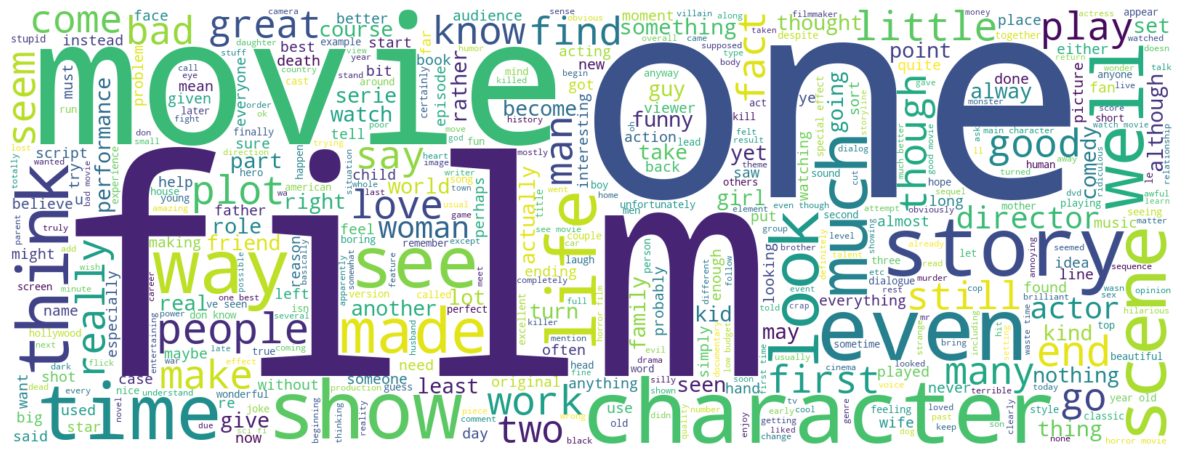

In [168]:
plt.figure(figsize=(15,15))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='white',).generate(' '.join(df.lemmetized_review.sum()))
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

(-0.5, 1599.5, 599.5, -0.5)

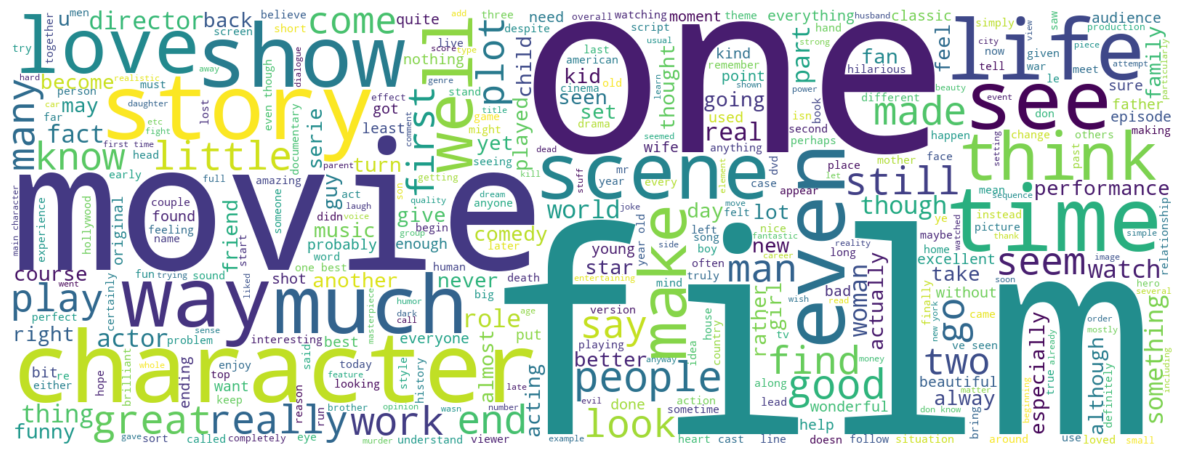

In [169]:
## Only for positive reviews
plt.figure(figsize=(15,15))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='white',).generate(' '.join(df.lemmetized_review[df['sentiment']=="positive"].sum()))
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

(-0.5, 1599.5, 599.5, -0.5)

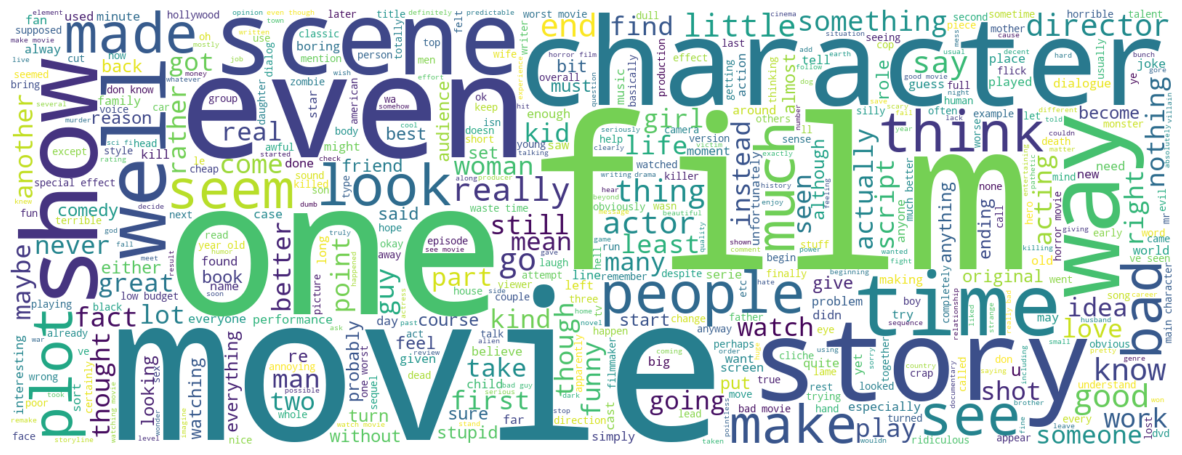

In [170]:
## Only for negative reviews
plt.figure(figsize=(15,15))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='white',).generate(' '.join(df.lemmetized_review[df['sentiment']=="negative"].sum()))
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

### Label Encoding

In [52]:
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

### Defining X and Y

In [53]:
X = df['lemmetized_review']

In [54]:
Y = df['sentiment']

### Applying train test split

In [55]:
train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size=0.3)

In [56]:
def input_fun(text):
    return text

## Tf-Idf Vectorizer

In [57]:
tfidf_vectorizer = TfidfVectorizer(max_features = 1000,lowercase=False,tokenizer=input_fun)
feature_train = tfidf_vectorizer.fit_transform(train_X)
feature_test = tfidf_vectorizer.transform(test_X)

C:\Python\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [63]:
# models to be trained 
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

In [67]:
accuracy = []

for model in models:
    cross_val = cross_val_score(model, feature_train, train_y, scoring='accuracy', 
                                cv= StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

In [68]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

accuracy_df = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
accuracy_df

,Model,Accuracy
0,DecisionTreeClassifier,0.700118
1,RandomForestClassifier,0.827095
2,LogisticRegression,0.860922
3,KNeighborsClassifier,0.724869
4,BernoulliNB,0.826375


In [97]:
svm = SVC()

In [99]:
svm.fit(feature_train,train_y)

SVC()

In [100]:
ywhat = svm.predict(feature_test)
print(classification_report(test_y,ywhat))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7431
           1       0.86      0.88      0.87      7444

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875



## Applying n-grams technique in order to preserve context along with Tf-Idf vectorizer 

In [111]:
tfidf_vectorizer_n_grams = TfidfVectorizer(max_features = 1000,lowercase=False,tokenizer=input_fun,ngram_range=(1,2))
feature_train_n_grams = tfidf_vectorizer_n_grams.fit_transform(train_X)
feature_test_n_grams = tfidf_vectorizer_n_grams.transform(test_X)

C:\Python\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [112]:
lr1 = LogisticRegression(max_iter=1000)

In [113]:
lr1.fit(feature_train_n_grams,train_y)

LogisticRegression(max_iter=1000)

In [114]:
ywhat1 = lr1.predict(feature_test_n_grams)

In [115]:
print(classification_report(test_y,ywhat1))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7431
           1       0.86      0.88      0.87      7444

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875



In [116]:
svm1 = SVC()

In [117]:
svm1.fit(feature_train_n_grams,train_y)

SVC()

In [118]:
ywhat_1 = svm1.predict(feature_test_n_grams)

In [119]:
print(classification_report(test_y,ywhat_1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7431
           1       0.86      0.88      0.87      7444

    accuracy                           0.87     14875
   macro avg       0.87      0.87      0.87     14875
weighted avg       0.87      0.87      0.87     14875



In [66]:
results_ngrams = pd.DataFrame({"Logisitic Regression":0.87,"SVM":"0.87"},index =["Accuracy_Score"])

In [67]:
results_ngrams

,Logisitic Regression,SVM
Accuracy_Score,0.87,0.87


## Applying Word2Vec

Given a large corpus of text, word2vec produces an embedding vector associated with each word in the corpus. These embeddings are structured such that words with similar characteristics are in close proximity to one another. 

In [120]:
from gensim.models import Word2Vec
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1 #The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored.
workers = 3
sg = 1 #The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

lemmetized_tokens = pd.Series(df['lemmetized_review']).values

In [121]:
w2vmodel = Word2Vec(lemmetized_tokens, min_count = min_count, vector_size = size, workers = workers, window = window, sg = sg)

In [122]:
#total number of words in the vocab
(w2vmodel.wv.vectors.shape)

(91126, 1000)

In [123]:
#size of vector for one word in word2vec
len(w2vmodel.wv['depress'])

1000

In [128]:
w2vmodel.wv.most_similar("bad",10)

[('awful', 0.24471811950206757),
 ('horrible', 0.239322230219841),
 ('lousy', 0.23763643205165863),
 ('terrible', 0.23352853953838348),
 ('horrendous', 0.22679777443408966),
 ('tomato', 0.22584830224514008),
 ('atrocious', 0.22325320541858673),
 ('cough', 0.2224675863981247),
 ('hee', 0.22227579355239868),
 ('ali', 0.22070875763893127)]

In [132]:
#Print the length after taking average of all word vectors in a sentence
print(len(np.mean([w2vmodel.wv[token] for token in df['lemmetized_review'][0]],axis=0)))

1000


In [139]:
index = 0
word2vec_filename = 'review_word2vec.csv'
with open(word2vec_filename, 'w') as word2vec_file:
    for i in range(49582):
        model_vector = (np.mean([w2vmodel.wv[token] for token in df['lemmetized_review'][i]], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        index+=1
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [140]:
review_vector = pd.read_csv(r"review_word2vec.csv")

In [141]:
review_vector.sample(4)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
8826,0.140922,-0.020689,0.118379,0.092342,-0.017593,-0.006835,0.003595,0.094219,-0.056832,-0.024987,...,0.026030,-0.014419,0.085572,0.029311,0.106298,0.047344,-0.079182,-0.085619,0.018390,-0.061245
45173,0.136458,0.003297,0.092425,0.036711,-0.019833,0.012583,-0.015273,0.066573,0.007980,-0.039598,...,0.037672,0.000400,0.055268,-0.024355,0.036545,0.014580,-0.041060,-0.100955,0.012852,-0.029054
40817,0.161704,0.025954,0.111645,0.064167,-0.027495,-0.016657,0.022002,0.070552,-0.044966,-0.013420,...,0.045739,-0.005019,0.103506,-0.004810,0.044456,0.027399,-0.086077,-0.113663,0.006431,-0.031678
26734,0.163875,0.001992,0.095177,0.055551,-0.021448,-0.008497,0.052160,0.067847,-0.039207,0.002014,...,0.026550,-0.016649,0.106284,0.004024,0.078836,0.014427,-0.082539,-0.133236,-0.000705,-0.056852


In [143]:
review_vector.shape

(49582, 1000)

In [144]:
df = pd.concat([df,review_vector],axis="columns")

In [145]:
df.shape

(49582, 1006)

In [146]:
df.sample(5)

,review,sentiment,length,tokenized_text,stemmed_review,lemmetized_review,0,1,2,3,...,990,991,992,993,994,995,996,997,998,999
46484,"title documentary misleading. no time documentary show introduction nile perch fish lake victoria cause problems facing town mwanza, tanzania. film tries place problems tanzania environmental cause truth matter problems stem parasitic outside force. documentary slowing paced no narrative ever. instead relies small blips text none related segments display bits information little add expand subject matter. two attempts discus environmental effects nile perch fish. one small segment 10 seconds long interview factory managers fish processed briefly mentions 50 years ago nile perch introduced lake consumed fish species. film maker makes no attempt follow matter go deeper it. second attempt within documentary film showing another documentary discussing environmental impact nile perch introdu...",0,573,"[title, documentary, misleading, no, time, documentary, show, introduction, nile, perch, fish, lake, victoria, cause, problems, facing, town, mwanza, tanzania, film, tries, place, problems, tanzania, environmental, cause, truth, matter, problems, stem, parasitic, outside, force, documentary, slowing, paced, no, narrative, ever, instead, relies, small, blips, text, none, related, segments, display, bits, information, little, add, expand, subject, matter, two, attempts, discus, environmental, effects, nile, perch, fish, one, small, segment, seconds, long, interview, factory, managers, fish, processed, briefly, mentions, years, ago, nile, perch, introduced, lake, consumed, fish, species, film, maker, makes, no, attempt, follow, matter, go, deeper, it, second, attempt, within, documentary,...","[titl, documentari, mislead, no, time, documentari, show, introduct, nile, perch, fish, lake, victoria, caus, problem, face, town, mwanza, tanzania, film, tri, place, problem, tanzania, environment, caus, truth, matter, problem, stem, parasit, outsid, forc, documentari, slow, pace, no, narr, ever, instead, reli, small, blip, text, none, relat, segment, display, bit, inform, littl, add, expand, subject, matter, two, attempt, discu, environment, effect, nile, perch, fish, one, small, segment, second, long, interview, factori, manag, fish, process, briefli, mention, year, ago, nile, perch, introduc, lake, consum, fish, speci, film, maker, make, no, attempt, follow, matter, go, deeper, it, second, attempt, within, documentari, film, show, ...]","[title, documentary, misleading, no, time, documentary, show, introduction, nile, perch, fish, lake, victoria, cause, problem, facing, town, mwanza, tanzania, film, try, place, problem, tanzania, environmental, cause, truth, matter, problem, stem, parasitic, outside, force, documentary, slowing, paced, no, narrative, ever, instead, relies, small, blip, text, none, related, segment, display, bit, information, little, add, expand, subject, matter, two, attempt, discus, environmental, effect, nile, perch, fish, one, small, segment, second, long, interview, factory, manager, fish, processed, briefly, mention, year, ago, nile, perch, introduced, lake, consumed, fish, specie, film, maker, make, no, attempt, follow, matter, go, deeper, it, second, attempt, within, documentary, film, showing, ...",0.158135,-0.007145,0.048356,0.044822,...,0.009698,-0.018483,0.097812,-0.018187,0.054478,-0.020324,-0.054321,-0.081220,0.006187,-0.039772
27586,"loved movie ""northfork"". knew nothing movie watching it. therefore, no outside influence information guide seeing unfold screen. retrospect would advise anyone interested movie watch no reason quality actors appear it. not read anything plot, story line, evaluation movie. fact stop reading anything comments although believe general would not spoil movie you, don't want diminish value movie you. find path meaning film diminished potential.in general, found 3 benign strangers northfolk puzzling. movie unfolds, could qualify three entertaining escapees men

In [148]:
X_word2vec = df.drop(columns=['review',"length","tokenized_text","stemmed_review","lemmetized_review","sentiment"])

In [149]:
X_word2vec

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.123439,0.006471,0.099533,0.063469,-0.043360,0.002756,0.001857,0.071326,-0.003205,-0.004162,...,0.043651,-0.006882,0.082133,-0.000337,0.080123,0.032228,-0.069120,-0.110337,0.007651,-0.049958
1,0.123812,0.000014,0.078354,0.056460,-0.028433,-0.021625,0.029020,0.081993,-0.032078,-0.006833,...,0.029636,-0.004589,0.107627,0.009454,0.021702,0.032039,-0.089169,-0.111828,0.005276,-0.037716
2,0.139321,0.002902,0.092689,0.061405,-0.054851,-0.004811,0.030715,0.075183,-0.038148,-0.000005,...,0.045425,-0.001196,0.084063,-0.020255,0.087161,0.019260,-0.065167,-0.128968,-0.010474,-0.049701
3,0.138750,-0.013237,0.090281,0.061898,-0.027917,0.013475,0.022075,0.057408,-0.023855,-0.006536,...,0.029583,-0.018242,0.076873,-0.011169,0.108587,0.026893,-0.100967,-0.109297,0.022453,-0.057439
4,0.150855,0.003861,0.108331,0.044712,-0.035367,-0.031866,0.035283,0.076807,-0.040547,0.005205,...,0.037489,0.003610,0.087887,-0.012171,0.052814,0.011320,-0.073761,-0.091995,-0.006032,-0.062813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0.151682,0.021542,0.119295,0.086504,-0.037171,0.013023,0.028895,0.070727,-0.032997,-0.014225,...,0.033472,0.002442,0.105596,-0.003979,0.091356,0.044639,-0.077456,-0.125492,-0.010336,-0.053746
49578,0.184847,0.014095,0.104365,0.061381,-0.013154,0.034286,-0.000939,0.080996,-0.017612,-0.001751,...,0.034007,-0.045991,0.108384,-0.030122,0.084685,0.006066,-0.100362,-0.109466,0.003244,-0.049957
49579,0.168980,-0.013585,0.087308,0.069404,-0.050105,-0.008768,0.023066,0.081450,-0.016415,0.012815,...,0.014900,-0.014718,0.092869,0.006786,0.069768,0.020036,-0.089266,-0.114557,-0.013870,-0.038390
49580,0.150303,0.008697,0.091362,0.074770,-0.024880,-0.002227,0.016174,0.071549,-0.019752,-0.015996,...,0.032768,-0.000319,0.090424,-0.006728,0.061756,0.026673,-0.074711,-0.100548,-0.017295,-0.045583


In [150]:
Y_word2vec = df['sentiment']

## Train test split

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X_word2vec,Y_word2vec,test_size=0.3)

In [153]:
X_train.shape

(34707, 1000)

In [154]:
y_test.shape

(14875,)

## Models

In [155]:
svm_word2vec = SVC()

In [157]:
svm_word2vec.fit(X_train,y_train)

SVC()

In [159]:
ywhat_word2vec = svm_word2vec.predict(X_test)

In [160]:
print(classification_report(y_test,ywhat_word2vec))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7376
           1       0.88      0.88      0.88      7499

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875



In [161]:
lr_word2vec = LogisticRegression(max_iter=1000)

In [162]:
lr_word2vec.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [163]:
ywhat_lr = lr_word2vec.predict(X_test)

In [164]:
print(classification_report(y_test,ywhat_lr))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7376
           1       0.88      0.88      0.88      7499

    accuracy                           0.88     14875
   macro avg       0.88      0.88      0.88     14875
weighted avg       0.88      0.88      0.88     14875



In [165]:
rfc = RandomForestClassifier()

In [166]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [167]:
ywhat_rfc = rfc.predict(X_test)

In [168]:
print(classification_report(y_test,ywhat_rfc))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7376
           1       0.83      0.86      0.84      7499

    accuracy                           0.84     14875
   macro avg       0.84      0.84      0.84     14875
weighted avg       0.84      0.84      0.84     14875



In [68]:
Models=["SVM","Logistic Regression","Random Forest Classifier"]

In [69]:
Accuracy=[0.88,0.88,0.84]

In [70]:
accuracy_df = pd.DataFrame({'Model': Models, 'Accuracy': Accuracy})
accuracy_df

,Model,Accuracy
0,SVM,0.88
1,Logistic Regression,0.88
2,Random Forest Classifier,0.84


## Result

Using Tf-Idf vectorizer for feature extraction, we obtain highest accuracy of 0.87 using SVM model and using word2vec as word embedding technique highest accuracy is using both SVM and Logistic regression which is 0.88